# Motivation:
As the 2020 American presidential election becomes more imminent, many candidates are proposing their stances on different hyped-up issues. One of which is tax. It is quoted that many Americans support higher marginal tax rate for the rich, with the belief that such a policy will decrease the level of inequality in US.

Having heard many economists, politicians, and celebrities proposing (arguing) their opinions on such issue, I decided that I'm too overwhelmed by all schools of thoughts. So I want to objectively understand how or even if inequality contributed to many societal issues.

As a trained data scientist, of course I would turn to data analytics to get to the bottom of inequality and its ramifications.

Here is my study on inequality and its societal ramification across the world.

# Table of Content:
<a href='#Import_libraries'># Import libraries</a>

<a href='#Preprocess_files'># Preprocess files</a>

<a href='#case1'>1. Case study on 2014</a>

<a href='#case2'>2. Case study over the past 4 decades</a>

<a href='#Parting_words'># Parting words</a>

<a id='Import_libraries'></a>
# # Import libraries

In [1]:
import zipfile
import os

import pandas as pd
from functools import reduce
import numpy as np

from sklearn.preprocessing import scale, StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

# # Measurement chosen for inequality: Gini Index 
## Gini Index Explained:
It is often used as a gauge of economic inequality, measuring income distribution or, less commonly, wealth distribution among a population. The coefficient ranges from 0 (or 0%) to 1 (or 100%), with 0 representing perfect equality and 1 representing perfect inequality. Values over 1 are theoretically possible due to negative income or wealth. <html>https://www.investopedia.com/terms/g/gini-index.asp</html>

In summary:
- gini close to 1 -> inequality
- gini close to 0 -> equality

<a id='Preprocess_files'></a>
# # Preprocess files

All data downloaded from world bank database. Data is provided from 1960 to 2018.
<html>https://data.worldbank.org/</html>

Included measures: (Inspired by a recent episode on BBC business daily called Taxing the Rich)
<html>https://www.bbc.co.uk/sounds/play/w3cswgls</html>

- Inequality
    - GINI index

- Economics
    - Unemployment 
    - GDP in current US dollar
    - Taxes on income, profits and capital gains
        - % of total taxes
        - in current US dollar converted from local currency   
    - Taxes on goods and services in current US dollar                                                                 
    
- Life Quality
    - Current health expenditure as % of GDP                                                                    
    - Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)                           
    - Internally displaced persons, new displacement associated with conflict and violence (number of cases)    

In [6]:
files = os.listdir("./data")
files = [x for x in files if ".zip" in x]
files

['API_GC.TAX.YPKG.CN_DS2_en_csv_v2_10474133.zip',
 'API_SP.MTR.1519.ZS_DS2_en_csv_v2_10478088.zip',
 'API_SL.UEM.TOTL.NE.ZS_DS2_en_csv_v2_10475519.zip',
 'API_GC.TAX.YPKG.ZS_DS2_en_csv_v2_10404978.zip',
 'API_NY.GDP.MKTP.CN_DS2_en_csv_v2_10473693.zip',
 'API_SH.XPD.CHEX.GD.ZS_DS2_en_csv_v2_10473783.zip',
 'API_SI.POV.GINI_DS2_en_csv_v2_10473721.zip',
 'API_GC.TAX.GSRV.CN_DS2_en_csv_v2_10477831.zip',
 'API_VC.IDP.NWCV_DS2_en_csv_v2_10478091.zip',
 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10475113.zip']

<a id='case1'></a>
# 1. Case study based on 2014 data
- Only 2014 data is being used since it has the least sparse data.

In [7]:
dfs = {}

for file_name in files:
    # opening the zip file in READ mode 
    with zipfile.ZipFile("./data/"+ file_name, 'r') as f: 
        # printing all the contents of the zip file 
        #f.printdir()
        dfs[file_name] = pd.read_csv(f.open(file_name.replace(".zip", ".csv")), header=2, error_bad_lines=False)

In [8]:
len(dfs)

10

In [9]:
dfs[files[0]].shape

(264, 64)

In [10]:
# use only 2014 data for least sparsity
dfList = []
for key, value in dfs.items():
    thing = value.iloc[:,[1,2,58]]
    thing = thing.rename(columns={thing.columns[-1]:thing.iloc[1,1]})
    thing = thing.drop("Indicator Name", axis = 1)
    dfList.append(thing)

In [11]:
full = reduce(lambda x, y: pd.merge(x, y, on = 'Country Code'), dfList)

In [13]:
country_names = dfs[files[0]][['Country Name', 'Country Code']]

In [14]:
# creating features standardized by US$
full['Taxes on goods and services (current US$)'] = full['Taxes on goods and services (current LCU)'] / full['GDP (current LCU)'] * full['GDP (current US$)']
full['Taxes on income, profits and capital gains (current US$)'] = full['Taxes on income, profits and capital gains (current LCU)'] / full['GDP (current LCU)'] * full['GDP (current US$)']

In [16]:
full.isnull().sum()

Country Code                                                                                                0
Unemployment, total (% of total labor force) (national estimate)                                          120
Current health expenditure (% of GDP)                                                                      31
GDP (current LCU)                                                                                          58
Taxes on goods and services (current LCU)                                                                 136
Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)                   252
GINI index (World Bank estimate)                                                                          194
Taxes on income, profits and capital gains (current LCU)                                                  139
GDP (current US$)                                                                                          15
Internally

In [17]:
# keep only countried reported gini indexes
sub = full.iloc[full.loc[:,"GINI index (World Bank estimate)"].dropna().index,:]

In [18]:
sub.isnull().sum()/sub.shape[0]

Country Code                                                                                              0.000000
Unemployment, total (% of total labor force) (national estimate)                                          0.157143
Current health expenditure (% of GDP)                                                                     0.014286
GDP (current LCU)                                                                                         0.000000
Taxes on goods and services (current LCU)                                                                 0.171429
Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)                   0.985714
GINI index (World Bank estimate)                                                                          0.000000
Taxes on income, profits and capital gains (current LCU)                                                  0.171429
GDP (current US$)                                                               

- Two data columns [Internally displaced persons, new displacement associated with conflict and violence (number of cases), and Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)] are highly sparse, so they are excluded from the analysis.

In [105]:
# get rid of massively missing data & fill missing data with median
filled = sub.loc[:,['Country Code',
       'Unemployment, total (% of total labor force) (national estimate)',            
       'GDP (current US$)',
       'Current health expenditure (% of GDP)',
       'GINI index (World Bank estimate)',
       'Taxes on income, profits and capital gains (% of total taxes)',
       'Taxes on goods and services (current US$)',
       'Taxes on income, profits and capital gains (current US$)']].fillna(sub.median())

In [106]:
# data info
filled.shape

(70, 8)

In [107]:
# linear correlation first look
filled.corr()

,"Unemployment, total (% of total labor force) (national estimate)",GDP (current US$),Current health expenditure (% of GDP),GINI index (World Bank estimate),"Taxes on income, profits and capital gains (% of total taxes)",Taxes on goods and services (current US$),"Taxes on income, profits and capital gains (current US$)"
"Unemployment, total (% of total labor force) (national estimate)",1.000000,0.000659,0.086211,-0.043208,0.022158,0.030276,0.040261
GDP (current US$),0.000659,1.000000,0.263700,0.054678,0.198552,0.950287,0.886926
Current health expenditure (% of GDP),0.086211,0.263700,1.000000,-0.208963,0.041129,0.318864,0.350871
GINI index (World Bank estimate),-0.043208,0.054678,-0.208963,1.000000,0.055070,-0.032067,-0.031462
"Taxes on income, profits and capital gains (% of total taxes)",0.022158,0.198552,0.041129,0.055070,1.000000,0.219165,0.359291
Taxes on goods and services (current US$),0.030276,0.950287,0.318864,-0.032067,0.219165,1.000000,0.951524
"Taxes on income, profits and capital gains (current US$)",0.040261,0.886926,0.350871,-0.031462,0.359291,0.951524,1.000000


In [108]:
# split X, y
X = filled.drop(["Country Code", "GINI index (World Bank estimate)"], axis = 1)
Y = filled.loc[:, "GINI index (World Bank estimate)"]

In [109]:
# standardization
scl = StandardScaler(copy=True, with_mean=True, with_std=True)
X_std = scl.fit_transform(X)

# # Build Model

## - Simple

In [110]:
lr = LinearRegression()
lr1 = LinearRegression.fit(lr, X = X_std, y = Y)

# Score of the linear model
lr1.score(X_std, Y)

0.11282663729294407

In [111]:
# Report the coefficients
X2 = sm.add_constant(X_std)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                                   OLS Regression Results                                   
Dep. Variable:     GINI index (World Bank estimate)   R-squared:                       0.113
Model:                                          OLS   Adj. R-squared:                  0.028
Method:                               Least Squares   F-statistic:                     1.335
Date:                              Thu, 14 Feb 2019   Prob (F-statistic):              0.255
Time:                                      12:33:05   Log-Likelihood:                -244.18
No. Observations:                                70   AIC:                             502.4
Df Residuals:                                    63   BIC:                             518.1
Df Model:                                         6                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

In [112]:
list(zip(range(1,7),X.columns))

[(1, 'Unemployment, total (% of total labor force) (national estimate)'),
 (2, 'GDP (current US$)'),
 (3, 'Current health expenditure (% of GDP)'),
 (4, 'Taxes on income, profits and capital gains (% of total taxes)'),
 (5, 'Taxes on goods and services (current US$)'),
 (6, 'Taxes on income, profits and capital gains (current US$)')]

> In terms of linear correlation, the only significantly correlated one with inequality (measured by gini index) is GDP. As suggested by the linear regression summary:
- Higher GDP is positively related with higher inequality.
- Otherwise, there does not seem to be strong linear correlation between any of the select features with inequality (measured by gini index).

## - Tree model

In [113]:
model = GradientBoostingRegressor()
#train the model
model.fit(X, Y)
#eval the model
model.score(X, Y)

0.982417994223079

([<matplotlib.axis.YTick at 0x10d329128>,
 <a list of 6 Text yticklabel objects>)

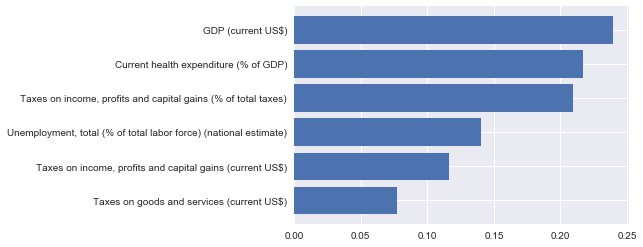

In [114]:
plt.barh(range(X.shape[1]),sorted(model.feature_importances_))
plt.yticks(range(X.shape[1]), tuple(X.columns[np.argsort(model.feature_importances_)]))

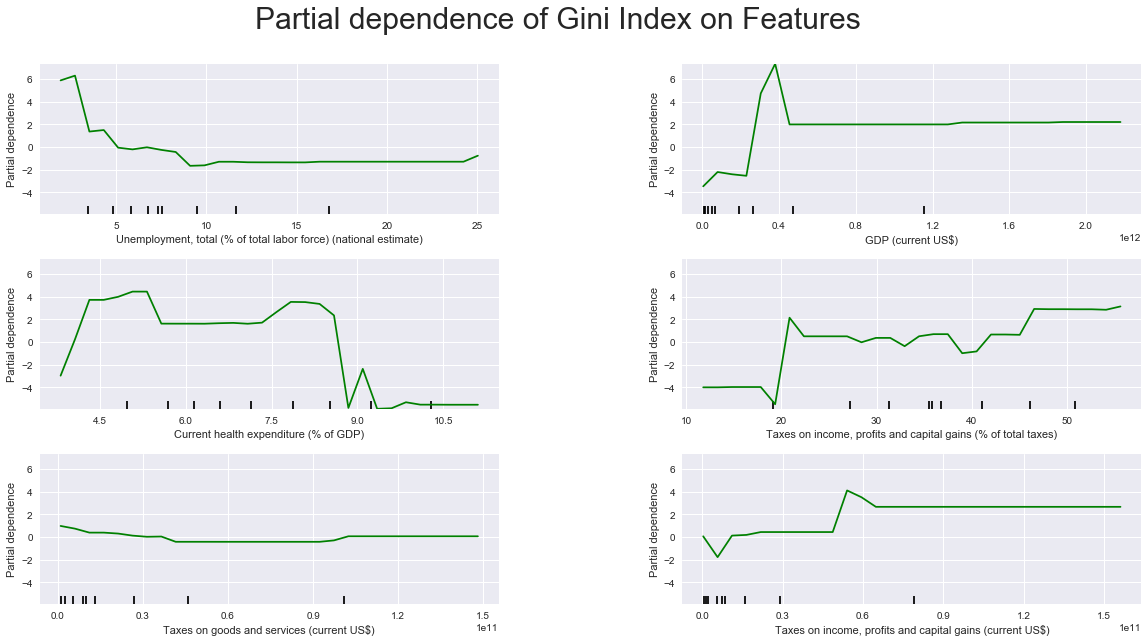

In [115]:
features = list(range(6))
fig, axs = plot_partial_dependence(model, X, features,
                                   feature_names=X.columns, 
                                   n_cols = 2,
                                   n_jobs=2, grid_resolution=30,
                                  figsize=(18, 10))
fig.suptitle('Partial dependence of Gini Index on Features', size = 30)
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

> The features that seem to be most correlated with the Gini index are, GDP, Taxes on income, profits and capital gains (% of total taxes), and Unemployment % of total labor force. None of them are stricly linearly correlated with the Gini index.
Based on the partial dependency plots, some of the most interesting findings are:
1. Up to certain level, GDP is positivley correlated with the Gini index. i.e. A higher inequality is correlated with higher GDP. This corroborates the finding in the linear model.
2. Unemployment is negativley correlated with the Gini index. i.e. A higher inequality is correlated with lower unemployment.
3. % of total taxes coming from taxes on income, profits and capitals gains is positivley correlated with the Gini index. i.e. A higher inequality is correlated with higher % of total taxes coming from taxes on income, profits and capitals gains. This might have been due to the increasing marginal tax rate that is adopted by each country.

> The first two findings seem to be especially interesting since many economists are debating whether inequality is hurting the economy. Based on the data from 70 countries, the answer seems to be negative.

However, what does it mean to have GDP positively correlate with inequality? Does it actually mean that the extra money allocated to the rich is more than fully recooped from their high-value generating work? Even when the finding is the ground truth, we still should not forget that after certain GDP level, the correlation goes the opposite way until there is almost no correlation. (Please refer to the first partial dependency plot)


In the same light, what does it mean to have unemployment negatively correlate with inequality? Maybe when more people are employed, the newly employed generally fall into the extreme end of salaries (extremely low or high salary), and thus intensifying the income inequality?

Moreover, what about the interaction between GDP and unemployment? The partial dependency plot compares the two variables of interest while holding all others constant, but what about the inter-dependency between GDP and unemployment? The following partial dependency plot will answer the question.

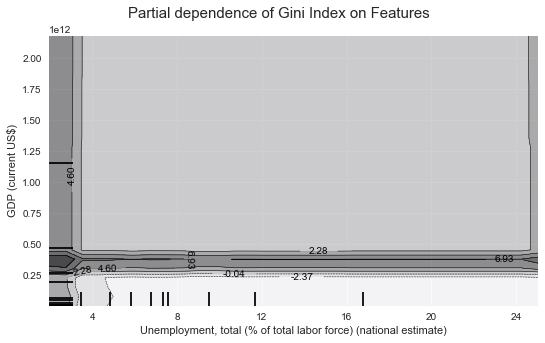

In [116]:
features = [(0,1)]
fig, axs = plot_partial_dependence(model, X, features,
                                   feature_names=X.columns, 
                                   n_cols = 2,
                                   n_jobs=2, grid_resolution=30,
                                  figsize=(8, 5))
fig.suptitle('Partial dependence of Gini Index on Features', size = 15)
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

> Still, higher unemployment correlates with lower inequality, even though the effect vanishes with a more than 5% unemployment.

> The stratified correlation between GDP and inequality appears again in the graph.

>In general, there is little inter-play between GDP and unemployment on inequality.

<a id='case2'></a>
# 2. Let's expand the time frame

Looking at the average value 1960 - 2018

In [62]:
data_avg = country_names.copy()
for key, value in dfs.items():
    data_avg[value.iloc[1, 2]] = value.iloc[:, 4:63].mean(skipna = True, axis = 1)

In [63]:
data_avg['Taxes on goods and services (current US$)'] = data_avg['Taxes on goods and services (current LCU)'] / data_avg['GDP (current LCU)'] * full['GDP (current US$)']

In [64]:
data_avg['Taxes on income, profits and capital gains (current US$)'] = data_avg['Taxes on income, profits and capital gains (current LCU)'] / full['GDP (current LCU)'] * data_avg['GDP (current US$)']

In [65]:
data_avg.isnull().sum()

Country Name                                                                                                0
Country Code                                                                                                0
Unemployment, total (% of total labor force) (national estimate)                                           25
Current health expenditure (% of GDP)                                                                      29
GDP (current LCU)                                                                                          52
Taxes on goods and services (current LCU)                                                                 105
Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)                   169
GINI index (World Bank estimate)                                                                          103
Taxes on income, profits and capital gains (current LCU)                                                  106
GDP (curre

In [66]:
# keep only countried reported gini indexes
sub_avg = data_avg.iloc[data_avg.loc[:,"GINI index (World Bank estimate)"].dropna().index,:]

In [67]:
sub_avg.isnull().sum()/sub_avg.shape[0]

Country Name                                                                                              0.000000
Country Code                                                                                              0.000000
Unemployment, total (% of total labor force) (national estimate)                                          0.024845
Current health expenditure (% of GDP)                                                                     0.012422
GDP (current LCU)                                                                                         0.000000
Taxes on goods and services (current LCU)                                                                 0.155280
Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)                   0.453416
GINI index (World Bank estimate)                                                                          0.000000
Taxes on income, profits and capital gains (current LCU)                        

- Two data columns [Internally displaced persons, new displacement associated with conflict and violence (number of cases), and Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)] are highly sparse, so they are excluded from the analysis.

In [95]:
# get rid of massively missing data & fill missing data with median
filled_avg = sub_avg.loc[:,['Country Code',
       'Unemployment, total (% of total labor force) (national estimate)',
       'GDP (current US$)',
       'Current health expenditure (% of GDP)',
       'GINI index (World Bank estimate)',
       'Taxes on income, profits and capital gains (% of total taxes)',
       'Taxes on goods and services (current US$)',
       'Taxes on income, profits and capital gains (current US$)']].fillna(sub_avg.median())

In [96]:
# data info
filled_avg.shape

(161, 8)

In [97]:
# split X, y
X_avg = filled_avg.drop(["Country Code", "GINI index (World Bank estimate)"], axis = 1)
Y_avg = filled_avg.loc[:, "GINI index (World Bank estimate)"]

In [98]:
# standardization
scl = StandardScaler(copy=True, with_mean=True, with_std=True)
X_avg_std = scl.fit_transform(X_avg)

# # Build Model

## - Simple

In [99]:
lr = LinearRegression()
lr1 = LinearRegression.fit(lr, X = X_avg_std, y = Y_avg)

# Score of the linear model
lr1.score(X_avg_std, Y_avg)

0.05483929028398715

In [100]:
# Report the coefficients
X2 = sm.add_constant(X_avg_std)
est = sm.OLS(Y_avg, X2)
est2 = est.fit()
print(est2.summary())

                                   OLS Regression Results                                   
Dep. Variable:     GINI index (World Bank estimate)   R-squared:                       0.055
Model:                                          OLS   Adj. R-squared:                  0.018
Method:                               Least Squares   F-statistic:                     1.489
Date:                              Thu, 14 Feb 2019   Prob (F-statistic):              0.185
Time:                                      12:13:57   Log-Likelihood:                -565.44
No. Observations:                               161   AIC:                             1145.
Df Residuals:                                   154   BIC:                             1166.
Df Model:                                         6                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

In [101]:
list(zip(range(1,10),X_avg.columns))

[(1, 'Unemployment, total (% of total labor force) (national estimate)'),
 (2, 'GDP (current US$)'),
 (3, 'Current health expenditure (% of GDP)'),
 (4, 'Taxes on income, profits and capital gains (% of total taxes)'),
 (5, 'Taxes on goods and services (current US$)'),
 (6, 'Taxes on income, profits and capital gains (current US$)')]

> In terms of linear correlation, the only significant correlation is that unemployment is positively correlated with inequality (measured by gini index).

## - Tree model

In [117]:
model = GradientBoostingRegressor()
#train the model
model.fit(X_avg_std, Y_avg)
#eval the model
model.score(X_avg_std, Y_avg)

0.8800232146648389

([<matplotlib.axis.YTick at 0x10ea2a908>,
 <a list of 6 Text yticklabel objects>)

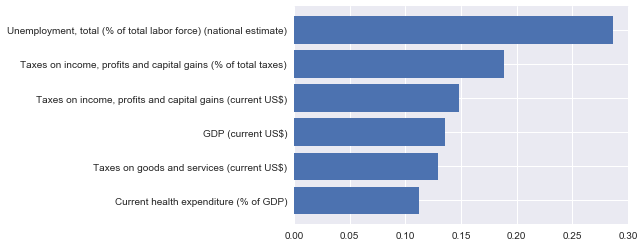

In [118]:
plt.barh(range(X_avg.shape[1]),sorted(model.feature_importances_))
plt.yticks(range(X_avg.shape[1]), tuple(X_avg.columns[np.argsort(model.feature_importances_)]))

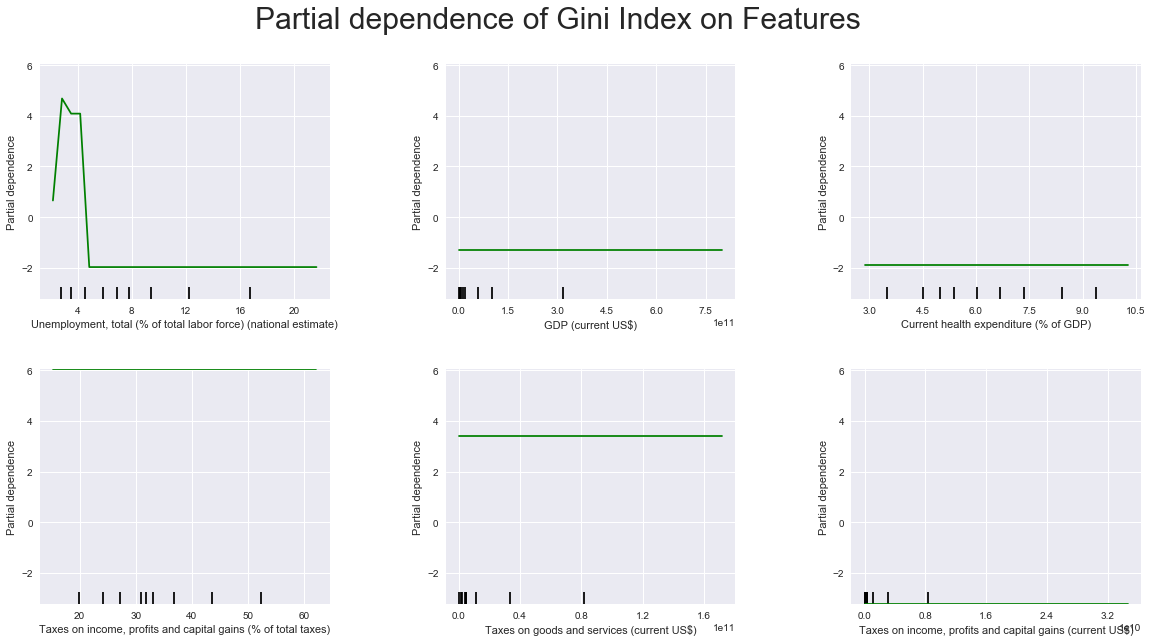

In [119]:
features = list(range(6))
fig, axs = plot_partial_dependence(model, X_avg, features,
                                   feature_names=X_avg.columns, 
                                   n_cols = 3,
                                   n_jobs=2, grid_resolution=30,
                                  figsize=(18, 10))
fig.suptitle('Partial dependence of Gini Index on Features', size = 30)
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

> According to historical data, most of the economic/welfare indexes are uncorrelated with inequality. GDP, health expenditure as a % of GDP, and varies taxes (and teenage pregancy & missplaced people when included) all fell into this finding. Of course there are other measures for economy and life quality, but no matter what the economists claim, inequality do not correlate with the previously mentioned measures.

> Tthe only feature that seems to be correlated with the Gini index is Unemployment % of total labor force. It is not stricly linearly correlated with the Gini index.
Based on the partial dependency plots, some of the most interesting findings are:
1. When unemployment rate is under 2%, it is positivley correlated with the Gini index. i.e. A higher inequality is correlated with higher unemployment. This corroborates the finding in the linear model.
2. When unemployment is between 2% and 5%, it is negativley correlated with the Gini index. i.e. A higher inequality is correlated with lower unemployment.
3. When unemployment is over 5%, there is no correlation between unemployment and the Gini index.


What's the significance of these cutoff points? How many countries fall into the each of the 3 bins (< 2%, 2-5%, > 5%)?

In [134]:
# under 2% unemployment
data_avg['Country Name'][data_avg['Unemployment, total (% of total labor force) (national estimate)'].apply(
    lambda row: row<=2)].reset_index()

,index,Country Name
0,16,Benin
1,121,Cambodia
2,125,Kuwait
3,135,Liechtenstein
4,171,Niger
5,198,Qatar
6,227,Chad
7,231,Thailand
8,255,Vietnam


> These 9 countries may have a postive association between inequality and unemployment. A lower inequality level may be seen with lower unemployment rate. 

In [145]:
# between 2% and 5% unemployment
print("# of countries:", data_avg['Unemployment, total (% of total labor force) (national estimate)'].apply(
    lambda row: row>2 and row <5).sum())
data_avg['Country Name'][data_avg['Unemployment, total (% of total labor force) (national estimate)'].apply(
    lambda row: row>2 and row <5)]

# of countries: 71


1                                      Afghanistan
6                             United Arab Emirates
12                                         Austria
13                                      Azerbaijan
14                                         Burundi
17                                    Burkina Faso
18                                      Bangladesh
20                                         Bahrain
23                                         Belarus
30                                          Bhutan
35                                     Switzerland
38                                           China
39                                   Cote d'Ivoire
41                                Congo, Dem. Rep.
44                                         Comoros
48                                            Cuba
59     East Asia & Pacific (excluding high income)
60                      Early-demographic dividend
61                             East Asia & Pacific
70                             

> Theses 71 countries may have negative correlation between inequality and unemployment. More inequality may be seen with lower unemployment rate.

In [146]:
# over 5% unemployment
print("# of countries:", data_avg['Unemployment, total (% of total labor force) (national estimate)'].apply(
    lambda row: row>5).sum())
data_avg['Country Name'][data_avg['Unemployment, total (% of total labor force) (national estimate)'].apply(
    lambda row: row>5)]

# of countries: 159


0                                                  Aruba
2                                                 Angola
3                                                Albania
5                                             Arab World
7                                              Argentina
8                                                Armenia
9                                         American Samoa
10                                   Antigua and Barbuda
11                                             Australia
15                                               Belgium
19                                              Bulgaria
21                                          Bahamas, The
22                                Bosnia and Herzegovina
24                                                Belize
25                                               Bermuda
26                                               Bolivia
27                                                Brazil
28                             

> Most of the countries (159) do not have a correlation between inequality and unemployment. Moreover, as previously stated, inequality do not seem to correlate with any other measure included in this study.

<a id='Parting_words'></a>
# # Parting Words
Obviously, this exercise is quite rudimentary so more sophisticated analysis can be done to explore the inter-relationship in more details. Some next steps that can be taken are:

1. Gather data from all countries in the world. Currently only 70 countries reported their Gini index thus the study is not comprehensive.
2. Revisit the measures for all subjects of interest. For example, is GDP a good measure for a country's overall properity? Is gini index the best one to represent inequality?
3. Go narrow instead of broad. For example, focusing on a particular group of countries to study what economic/welfare measures correlate the inequality. The last finding on the stratified effect of unemployment on inequality can be a motivation. For instance, another way to conduct focused study if to group countries by GDP.

### So what's the takeaway from this exercise?

Based on almost 4 decades of historical data, **inequality did not seem to correlate with some common social issues**: no correlation found with some economic measures (e.g. GDP and taxes on income or goods) or some life quality measures (e.g. healthcare expenditure, teen pregnancy, and mis-placed people). The only correlations found are between inequality and certain ranges of unemployment rates. The direction of the correlation also does a 180 in different ranges. Thus, from this study, it seems like inequality is relatively detached from many major social issues.

Does that make inequality not an issue? It really depends on the definition of inequality. Is it likely that there would be no perfect equality when it comes to wealth. I don't disagree with rewarding more talent with more pay. Yet when people are unfairly subject to inequality, for example when their talent is not reciprocated at a fair value, then it is a issue. It then becomes a issue of a violation on ethics and fairness. 

What is a more actionable focus in my perspective, however, is **providing equal opportunities**. Is it likely that there would be no perfect equality when it comes to wealth. With that in mind, people who have influence in the society should instead focus on giving all people access to the same opportunities, some of which would be unattainable to under-priviledged people given their income level. The end result of such a gesture will not be wealth equality either. Instead, it will give each person an equal opportunity to become his/her best self.

Here is an example of what I mean by equal opportunities. Having tiered or entirely free entrance fee to an art musuem. This will allow people of all income level to have the same access to culture and art.

To gain the financial means to make such a change, it is understandable that a government's most straight-forward solution is to increase tax. However, two things should be kept in mind.
1. This is only a means to an end. Per the study, there is no correlation between the amount of taxes collected on income or goods and (in)equality.
2. Some systemetic changes require financial support while most require **mental support**. A change can be as simple as not shutting down a person's speech just because he is wearing shabby clothes (for all we know he might just be Mark Zuckerberg). **A change like that can be made by every single one of us starting from this very moment.**